# <center>矩阵与数值分析上机实习</center>

* 全世界石油产量（百万桶每日）如下表所示，确定并画出经过这些点的 $9$ 阶多项式，并使用该多项式估计 $2010$年的石油产量。龙格现象在这个例子中出现了吗？以你的观点，插值多项式是描述这些数据好的模型吗？请解释。
<img src='img02.png', width='50%'/>

将年份 $1994-2003$ 区间缩放到 $0-9$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_k = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_k = [67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777]

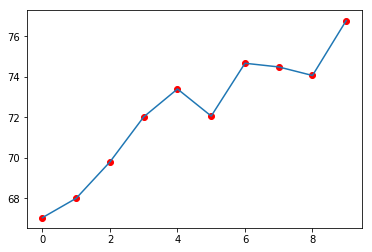

In [3]:
plt.scatter(x_k, y_k, c='r')
plt.plot(x_k, y_k)

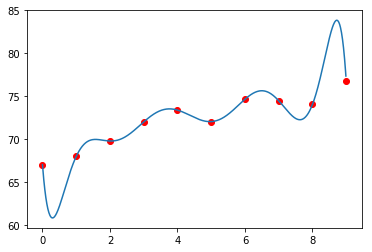

In [4]:
A = []
for i in range(len(x_k)):
    x = []
    for j in range((len(x_k)-1), -1, -1):
        x.append(x_k[i] ** j)
    A.append(x)
A = np.array(A)
b = np.array(y_k)
w = np.linalg.solve(A, b)

def f(x, w):
    X = []
    for i in range((len(w)-1), -1, -1):
        X.append(x ** i)
    X = np.array(X)
    
    return X.dot(w.T)

x = np.arange(0, 9, 0.01)
y = []
for i in range(len(x)):
    y.append(f(x[i], w))
plt.scatter(x_k, y_k, c='r')
plt.plot(x, y)

* 用最小二乘法拟合题目 $1$ 中的 $10$ 个数据点，拟合曲线为 $(1)$ 直线；$(2)$ 抛物线，以及 $(3)$ 三次曲线，并计算它们的均方误差。使用所有的拟合曲线估计 $2010$ 年的产量，在均方误差意义下，哪个拟合最好？

In [5]:
def create_A(x, n):
    A = []
    for i in range(len(x)):
        row = []
        for j in range(n, -1, -1):
            row.append(x[i] ** j)
        A.append(row)
    return np.array(A)

In [6]:
def get_w(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [7]:
def fun1(x, w):
    row = []
    for i in range(len(w)-1, -1, -1):
        row.append(x ** i)
    row = np.array(row)
    return row.dot(w.T)

（1） 拟合直线  $y = ax + b$

In [8]:
X = create_A(x_k, 1)
y = np.array(y_k).T
w = get_w(X, y)
w

array([  0.96934545,  67.87274545])

In [9]:
fun1(16, w)

83.382272727272664

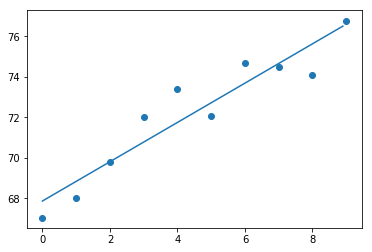

In [10]:
x = np.arange(0, 9, 0.1)
y = []
for i in range(len(x)):
    y.append(fun1(x[i], w))
plt.scatter(x_k, y_k)
plt.plot(x, y)

（2） 拟合抛物线 $y = ax^2 + bx + c$

In [11]:
X = create_A(x_k, 2)
y = np.array(y_k).T
w = get_w(X, y)
w

array([ -0.07235227,   1.62051591,  67.00451818])

In [12]:
fun1(16, w)

74.410590909089393

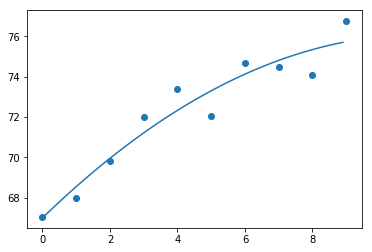

In [13]:
x = np.arange(0, 9, 0.1)
y = []
for i in range(len(x)):
    y.append(fun1(x[i], w))
plt.scatter(x_k, y_k)
plt.plot(x, y)

（3） 拟合三次曲线  $y = ax^3 + bx^2 + cx + d$

In [14]:
X = create_A(x_k, 3)
y = np.array(y_k).T
w = get_w(X, y)
w

array([  1.82130925e-02,  -3.18229021e-01,   2.46013947e+00,
         6.65455483e+01])

In [15]:
fun1(16, w)

99.041977156239582

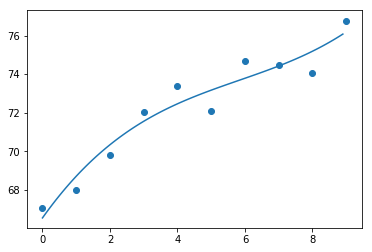

In [16]:
x = np.arange(0, 9, 0.1)
y = []
for i in range(len(x)):
    y.append(fun1(x[i], w))
plt.scatter(x_k, y_k)
plt.plot(x, y)

* 用 $Newton$ 法求解方程 $x^3 + x^2 + x - 3 = 0$ 的根，初值选择 $x_0 = -0.7$，迭代 $7$ 步并与真值 $x^* = 1$ 相比较，并列出如下表格
<img src='img03.png' width='40%'/>
从最后一列能得到什么结论（从收敛阶的角度回答）？把最后一列的值与 $f^{''}(x^{*})\div (2f^{'}(x^{*}))$ 相比较能得到什么结论？

In [17]:
# 原函数F(x)
def F3(x):
    return x ** 3 + x ** 2 + x - 3

# 导函数f(x)
def f3(x):
    return 3 * x ** 2 + 2 * x + 1

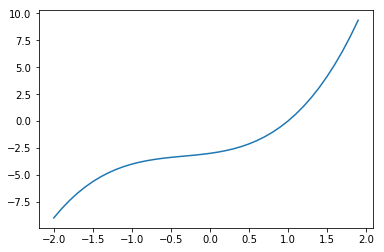

In [18]:
x = np.arange(-2, 2, 0.1)
y = []
for i in range(len(x)):
    y.append(F3(x[i]))
plt.plot(x, y)

In [19]:
def ff3(x):
    return 6 * x + 2

In [20]:
def e_i(x_i, x_true):
    return np.abs(x_i - x_true)
def ee_i(e_1, e_0):
    return e_1 / (e_0 ** 2)

In [21]:
def newton(x):
    return x - F3(x)/f3(x)

In [22]:
x0 = -0.7
x_i = x0
for i in range(8):
    if i==0:
        print(i, x_i, np.abs(x_i - 1), '-')
    else:
        old_x = x_i
        x_i = newton(x_i)
        print(i,x_i, e_i(x_i, 1), ee_i(e_i(x_i, 1),e_i(old_x, 1)))

0 -0.7 1.7 -
1 2.6205607476635517 1.62056074766 0.560747663551
2 1.7084401902625614 0.708440190263 0.269756898741
3 1.2063786980181086 0.206378698018 0.411205094191
4 1.024161664125103 0.0241616641251 0.567279521786
5 1.0003814911210203 0.00038149112102 0.653477665331
6 1.0000000969928142 9.69928142247e-08 0.666454786688
7 1.0000000000000062 6.2172489379e-15 0.660874714617


In [23]:
x_i, ff3(1)/(2*f3(1))

(1.0000000000000062, 0.6666666666666666)

* 分别使用 $Gauss$ 消元法，$Jacobi$ 迭代法，$Gauss-Seidel$ 迭代法及共轭梯度法求解方程组 $Hx = b$，其中 $H=[1\div (i+j-1)]_{n \times n}$ 为 $Hilbert$ 矩阵，$b$ 是全为 $1$ 的向量，$(a) \ n=4 \ (b) \ n=8$。

In [69]:
# 创建Hilbert矩阵
def create_H(n):
    H = np.ones((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = H[i, j]/(i+1+j+1-1)
    return H

'''求解方程组'''
# Gauss消元法
def gauss(H, b):
    n = len(b)
    for i in range(n - 1):
        for j in range(i+1, n):
            if H[j, i] != 0.0:
                div = H[j, i]/H[i, i]
                H[j, (i+1): n] = H[j, (i+1): n] - div * H[i, (i+1): n]
                b[j] = b[j] - div * b[i]
    for k in range(n-1, -1, -1):
        b[k] = (b[k] - np.dot(H[k, (k+1): n], b[(k+1): n])) / H[k, k]
    return b

# Jacobi迭代法
def jacobi(H, b, x0, k):
    D = np.diag(np.diag(H))
    L = - np.tril(H, -1)
    U = - np.triu(H, 1)
    B = np.linalg.inv(D).dot(L+U)
    f = np.linalg.inv(D).dot(b)
    x = B.dot(x0) + f
    n = 1
    for i in range(k-1):
        x0 = x
        x = B.dot(x0) + f
        n = n + 1
    return x

# Gauss-Seidel迭代法
def gauss_seidel(H, b, x0, k):
    D = np.diag(np.diag(H))
    L = - np.tril(H, -1)
    U = - np.triu(H, 1)
    G = np.linalg.inv(D-L).dot(L)
    f = np.linalg.inv(D-L).dot(b)
    x = G.dot(x0) + f;
    for i in range(k-1):
        x0 = x
        x = G.dot(x0) + f
    return x

In [70]:
n = 4
H = create_H(n)
b = np.ones((n, 1))

In [71]:
gauss(H, b)

array([[  -4.],
       [  60.],
       [-180.],
       [ 140.]])

In [72]:
x0 = np.zeros((n, 1))
jacobi(H, b, x0, 50)

array([[ -9.84072128e+69],
       [ -3.44739654e+70],
       [ -9.44902744e+70],
       [ -7.10224379e+71]])

In [84]:
x0 = np.zeros((n, 1))
gauss_seidel(H, b, x0, 20)

array([[ -4.00000000e+00],
       [  7.68000000e+02],
       [ -5.49600000e+04],
       [  2.63984000e+06]])

In [151]:
n = 8
H = create_H(n)
b = np.ones((n, 1))

In [152]:
gauss(H, b)

array([[ -8.00000015e+00],
       [  5.04000005e+02],
       [ -7.56000004e+03],
       [  4.62000001e+04],
       [ -1.38600000e+05],
       [  2.16216000e+05],
       [ -1.68168000e+05],
       [  5.14799999e+04]])

* 编程计算三次样条 $S$，满足 $S(0)=1, S(1)=3, S(2)=3, S(3)=4, S(4)=2$，其中边界条件 $S^{'}(0)=S^{''}(0)=0$

* 取不同的初值用弦截法求方程 $x^3+2x^2+10x-100=0$ 的实根，列表或者画图说明收敛速度。

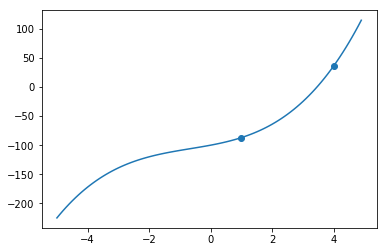

In [24]:
def f4(x):
    return x ** 3 + 2 * x ** 2 + 10 * x - 100

x = np.arange(-5, 5, 0.1)
y = []
for i in range(len(x)):
    y.append(f4(x[i]))
plt.plot(x, y)
x0 = 4
x1 = 1
y0 = f4(x0)
y1 = f4(x1)
plt.scatter([x0, x1], [y0, y1])

In [25]:
def iter4(x1, x0):
    return x1 - (f4(x1) * (x1 - x0))/(f4(x1) - f4(x0))

In [26]:
for i in range(2, 10):
    x2 = iter4(x1, x0)
    x0 = x1
    x1 = x2
    print(x1)

3.1219512195121952
3.7092310257312757
3.442969525792038
3.4597053840248164
3.4605899507712587
3.4605867261345815
3.460586726723287
3.460586726723288


* 令 $f(x)=e^{3x}cos(\pi x)$，考虑积分 $\int_{0}^{2\pi}f(x)dx$ 。区间分为 $50,100,200,500,1000$ 等，分别用复合梯形以及复合 $Simpson$ 积分公式计算积分值，将数值积分的结果与精准值比较，列表说明误差的收敛性。

In [110]:
def f8(x):
    return np.exp(3 * x) * np.cos(np.pi * x)

def complex_echelon(a, b, ns):
    Ts = {}
    for n in ns:
        d = (b - a) / n
        x = np.linspace(a+d, b-d, n-1)
        T = (b - a)/(2 * n) * (f8(a) + f8(b) + np.sum(f8(x)))
        Ts[n] = T
    return Ts

def complex_simpson(a, b, ns):
    Ts = {}
    for n in ns:
        d = (b - a) / (2 * n)
        x = np.linspace(a+d, b-d, 2 * n -1)
        i = np.array(range(len(x)))
        x1 = x[(i+1)%2==0]
        x2 = x[(i+1)%2!=0]
        T = (b - a)/(6 * n) * (f8(a) + f8(b) + 2 * np.sum(f8(x1)) + 4 * np.sum(f8(x2)))
        Ts[n] = T
    return Ts

In [115]:
a = 0
b = 2 * np.pi
ns = [50, 100, 200, 500, 1000]
complex_echelon(a, b, ns)

{50: 20600260.144037433,
 100: 19121240.373277199,
 200: 18372164.87582387,
 500: 17919443.637618996,
 1000: 17767981.868488476}

In [116]:
a = 0
b = 2 * np.pi
ns = [50, 100, 200, 500, 1000]
complex_simpson(a, b, ns)

{50: 35231407.868334904,
 100: 35232416.23782251,
 200: 35232479.168076426,
 500: 35232483.254452005,
 1000: 35232483.355091162}

In [118]:
from scipy.integrate import quad
quad(lambda  x:f8(x),0, 2 * np.pi)

(35232483.36180031, 0.015568195862194167)

* 列表说明收敛性

* 分别用 $2$ 点，$3$ 点以及 $5$ 点的 $Gauss$ 型积分公式计算如下定积分：
$$(1) \ \int_{-1}^{1}\frac{x^2}{\sqrt{1-x^2}}dx,\ (2) \ \int_{0}^{\frac{\pi}{2}}\frac{sinx}{x}dx$$

In [132]:
def f9_1(x):
    return x ** 2 / np.sqrt(1 - x ** 2)

def f9_2(x):
    return np.sin(x) / x

def point_2(f, a, b):
    c = (a + b) / 2
    t = b - c
    x0 = c + t * - 1 / np.sqrt(3)
    x1 = c + t * 1 / np.sqrt(3)
    A0 = 1
    A1 = 2
    return t * (f(x0) + f(x1))

def point_3():
    return 

def point_5():
    return

In [134]:
point_2(f9_1, -1, 1)

0.81649658092772637

In [135]:
quad(lambda  x:f9_1(x),-1, 1)

(1.5707963267946612, 3.896782452272873e-09)

In [133]:
point_2(f9_2, 0, np.pi/2)

1.3704190473439428

In [136]:
quad(lambda  x:f9_2(x), 0, np.pi/2)

(1.3707621681544881, 1.5218517203702133e-14)

* 考虑微分方程初值问题：
    \begin{equation}
    \left\{
    \begin{aligned}
    &\frac{dy}{dx} = ycost\\
    &y(0) = 1
    \end{aligned}
    \right.
    \end{equation}

 分别用 $Euler$ 法，改进的 $Euler$ 法，$Runge-Kutta$ 法求解该方程。分别取步长为 $0.1,0.01,0.001$，计算到 $x(1)$，画图说明结果。

In [150]:
hs = [0.1, 0.01, 0.001]
def euler():
    U = {}
    for h in hs:
        u = 1
        t0 = -1
        for i in range((int)(1/h)+1):
            u0 = u
            t0 = t0 + 1
            u = u0 + h * (u0 * np.cos(t0))
        U[h] = u
    return U

def impove_euler():
    U = {}
    for h in hs:
        u = 1
        t0 = 0
        for i in range((int)(1/h)+1):
            u0 = u
            u1 = u0 + h * (u0 * np.cos(t0))
            t0 = t0 + 1
            u = u0 + h/2 * (u0 * np.cos(t0) + u1 * np.cos(t0))
        U[h] = u
    return U

def runge_kutta():
    return

In [149]:
euler()

{0.001: 1.0007256246773777, 0.01: 0.99357509972434743, 0.1: 1.0158487547305843}

In [ ]:
impove_euler()

* 画图说明结果